# 3-Sigma Technique(Standard Deviation)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [57]:
df=pd.read_csv('Titanic-Dataset.csv')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomlies(df):
    # define a list to accumlate anomlies
    anomlies=[]
    
    # set upper and lower limit to 3 standard deviation
    random_data_std=statistics.stdev(df)
    random_data_std=statistics.mean(df)
    
    # 3-standard deviation
    anomly_cut_off=random_data_std*3
    
    lower_limit=random_data_std-anomly_cut_off
    upper_limit=random_data_std+anomly_cut_off
    
    #Generate outliers
    for outlier in df:
        if outlier>upper_limit or outlier<lower_limit:
            anomlies.append(outlier)
    return anomlies    
    

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
len(df.Fare)

891

In [65]:
df.Age.isnull().sum()

177

In [66]:
df['Age']=df["Age"].fillna(df['Age'].mean())

In [67]:
list1=find_anomlies(df['Age'])
len(list1)

0

In [69]:
# check skewness of column
df.Age.skew()

0.4344880940129925

- 4.7873.. means that the Fare column is right skewed. We can verify this skewness by plotting a graph using seaborn's kdeplot.

In [70]:
df.Age.isnull().sum()

0

<Axes: xlabel='Age', ylabel='Density'>

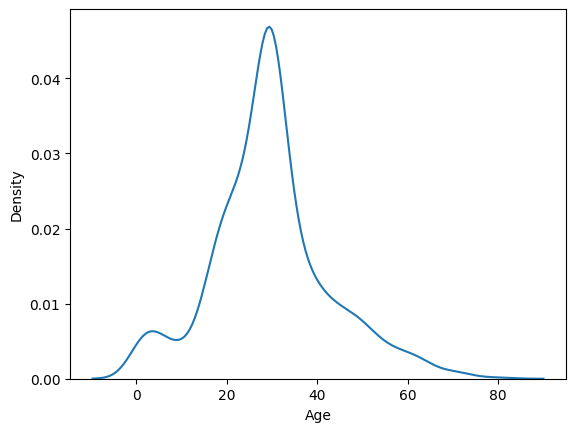

In [71]:
sns.kdeplot(data=df['Age'])

- As our `Fare` column is right skewed, so we will normalize this data by log transformation. 

In [72]:
df['transformed_age']=np.log(df.Age)
# print(df['transformed_fare'])

In [73]:
df.transformed_age.skew()

-2.6823671642592353

In [74]:
list_2 = find_anomlies(df.Age)
len(list_2)

0

In [75]:
len(df)

891

<Axes: >

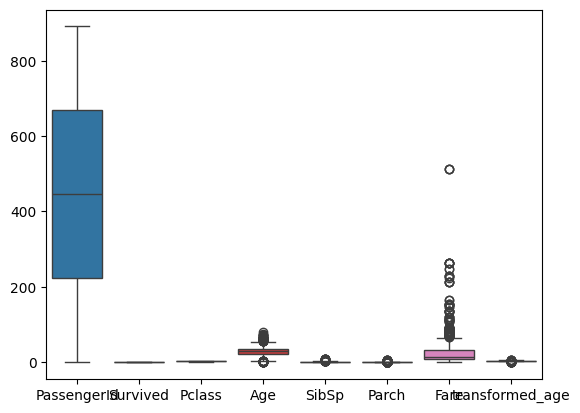

In [78]:
sns.boxplot(data=df)